<a href="https://colab.research.google.com/github/Jahan08/Amber-tutorial/blob/main/Mtb_MIC_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 6.8 MB/s eta 0:00:00
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client


target serach for Mtb

In [ ]:
target = new_client.target
target_query = target.search('mycobacterium tuberculosis')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mycobacterium tuberculosis,Mycobacterium tuberculosis,27.0,False,CHEMBL360,[],ORGANISM,1773
1,[],Mycobacterium tuberculosis H37Rv,Mycobacterium tuberculosis H37Rv,24.0,False,CHEMBL2111188,[],ORGANISM,83332
2,[],Mycobacterium tuberculosis H37Ra,Mycobacterium tuberculosis H37Ra,24.0,False,CHEMBL2366634,[],ORGANISM,419947
3,[],Mycobacterium,Mycobacterium,13.0,True,CHEMBL614981,[],ORGANISM,1763
4,[],Mycobacterium tuberculosis,PYRAZINAMIDASE/NICOTINAMIDAS PNCA (PZase),13.0,False,CHEMBL1697663,"[{'accession': 'Q50575', 'component_descriptio...",SINGLE PROTEIN,1773
...,...,...,...,...,...,...,...,...,...
117,[],Mycobacterium tuberculosis,70S ribosome,7.0,False,CHEMBL2363965,"[{'accession': 'P9WHE1', 'component_descriptio...",PROTEIN NUCLEIC-ACID COMPLEX,1773
118,[],Mycobacterium tuberculosis,ATP synthase,7.0,False,CHEMBL2364166,"[{'accession': 'P9WPU9', 'component_descriptio...",PROTEIN COMPLEX,1773
119,[],Mycobacterium tuberculosis,Thioredoxin reductase,7.0,False,CHEMBL2390811,"[{'accession': 'P9WHH1', 'component_descriptio...",SINGLE PROTEIN,1773
120,[],Mycobacterium tuberculosis,ATP-dependent Clp protease ATP-binding subunit...,7.0,False,CHEMBL4630874,"[{'accession': 'P9WPC9', 'component_descriptio...",SINGLE PROTEIN,1773


selecting the target

In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL360'

In [ ]:
activity = new_client.activity
SEL = activity.filter(target_chembl_id=selected_target)
df = pd.DataFrame.from_dict(SEL)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Not Determined,31883,[],CHEMBL752464,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0000201,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,Inhibition,None,UO_0000187,None,None
1,None,33041,[],CHEMBL752463,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0000201,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,Inhibition,%,UO_0000187,None,0.0
2,None,33985,[],CHEMBL749419,Minimum inhibitory concentration against Mycob...,F,None,None,BAO_0000179,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,pMIC,None,None,None,1.92
3,None,33986,[],CHEMBL749419,Minimum inhibitory concentration against Mycob...,F,None,None,BAO_0000179,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,pMIC,None,None,None,1.82
4,None,34021,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,ug ml-1,UO_0000274,None,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169139,None,23311398,[],CHEMBL4844138,Antimycobacterial activity against multi drug-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,60.0
169140,None,23311399,[],CHEMBL4844139,Antimycobacterial activity against rifampicin-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,60.0
169141,None,23311524,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844154,In vivo antimycobacterial activity against Myc...,F,None,None,BAO_0000181,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,Activity,log10CFU,None,None,2.0
169142,None,23311525,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844155,In vivo antimycobacterial activity against Myc...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,9.1


Consider MIC as Bioactivity property

In [ ]:
df.to_csv('bioactivity_data_Mtb_raw_data.csv', index=False)

In [ ]:
import pandas as pd 
df = pd.read_csv('/content/bioactivity_data_Mtb_raw_data.csv', header = 0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,12,13,15,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="MIC")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,34021,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,ug ml-1,UO_0000274,None,0.5
1,None,34115,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,ug ml-1,UO_0000274,None,1.0
2,None,36502,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,ug ml-1,UO_0000274,None,0.125
3,None,42561,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,ug ml-1,UO_0000274,None,0.125
4,None,44868,[],CHEMBL715914,In vitro antibacterial activity of compound ag...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,ug ml-1,UO_0000274,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25964,None,23311396,[],CHEMBL4844136,Antimycobacterial activity against multi drug-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,30.0
25965,None,23311397,[],CHEMBL4844137,Antimycobacterial activity against isoniazid-r...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,30.0
25966,None,23311398,[],CHEMBL4844138,Antimycobacterial activity against multi drug-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,60.0
25967,None,23311399,[],CHEMBL4844139,Antimycobacterial activity against rifampicin-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,60.0


In [ ]:
df.to_csv('bioactivity_data_Mtb_MIC.csv', index=False)

In [ ]:
# considering nM unit for MIC
df = df[(df['standard_units'] == 'nM')]
len(df)

12340

In [ ]:
df.standard_type.unique()

array(['MIC'], dtype=object)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
76,None,146062,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,572.0
77,None,146063,[],CHEMBL744028,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,572.0
78,None,148504,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,33.6
79,None,148505,[],CHEMBL744028,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,67.2
80,None,148506,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,31.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25964,None,23311396,[],CHEMBL4844136,Antimycobacterial activity against multi drug-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,30.0
25965,None,23311397,[],CHEMBL4844137,Antimycobacterial activity against isoniazid-r...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,30.0
25966,None,23311398,[],CHEMBL4844138,Antimycobacterial activity against multi drug-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,60.0
25967,None,23311399,[],CHEMBL4844139,Antimycobacterial activity against rifampicin-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,60.0


In [ ]:
df.to_csv('bioactivity_data_Mtb_MIC_nM.csv', index=False)

handling the missing data

In [ ]:
df = df[df.standard_value.notna()]
df = df[df.value.notna()]
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
76,None,146062,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,572.0
77,None,146063,[],CHEMBL744028,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,572.0
78,None,148504,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,33.6
79,None,148505,[],CHEMBL744028,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,67.2
80,None,148506,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,31.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25964,None,23311396,[],CHEMBL4844136,Antimycobacterial activity against multi drug-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,30.0
25965,None,23311397,[],CHEMBL4844137,Antimycobacterial activity against isoniazid-r...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,30.0
25966,None,23311398,[],CHEMBL4844138,Antimycobacterial activity against multi drug-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,60.0
25967,None,23311399,[],CHEMBL4844139,Antimycobacterial activity against rifampicin-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,60.0


In [ ]:
df = df[df.canonical_smiles.notna()]
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
76,None,146062,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,572.0
77,None,146063,[],CHEMBL744028,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,572.0
78,None,148504,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,33.6
79,None,148505,[],CHEMBL744028,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,67.2
80,None,148506,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,31.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25964,None,23311396,[],CHEMBL4844136,Antimycobacterial activity against multi drug-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,30.0
25965,None,23311397,[],CHEMBL4844137,Antimycobacterial activity against isoniazid-r...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,30.0
25966,None,23311398,[],CHEMBL4844138,Antimycobacterial activity against multi drug-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,60.0
25967,None,23311399,[],CHEMBL4844139,Antimycobacterial activity against rifampicin-...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,60.0


Define the activity

<=1000 nM active
rather inactive

In [ ]:
fix = []

for i in df.standard_value:
    fix.append(float(i))

In [ ]:
STATUS = []

for i in fix:
    if i <=10000:
        STATUS.append("Yes") #active
        
    elif i >=50000:
        STATUS.append("NO") #inactive
        
    else:
        STATUS.append("Intermediate") #intermediate

In [ ]:
df = df.drop('value', 1)
df['value'] = fix
df['Activity'] = STATUS
df.head(3)

<ipython-input-22-90299a80648f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('value', 1)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,Activity
76,None,146062,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,572000.0,NO
77,None,146063,[],CHEMBL744028,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,572000.0,NO
78,None,148504,[],CHEMBL751176,Compound was tested in vitro for growth inhibi...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,33600.0,Intermediate


In [ ]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_type', 'standard_value', 'standard_units', 'Activity']
df2 = df[selection]
df2

,molecule_chembl_id,canonical_smiles,standard_type,standard_value,standard_units,Activity
76,CHEMBL169287,OB1N=C(c2cnccn2)Nc2ccccc21,MIC,572000.0,nM,NO
77,CHEMBL169287,OB1N=C(c2cnccn2)Nc2ccccc21,MIC,572000.0,nM,NO
78,CHEMBL168899,O=C1Nc2ccccc2B(O)N1c1ccccc1,MIC,33600.0,nM,Intermediate
79,CHEMBL168899,O=C1Nc2ccccc2B(O)N1c1ccccc1,MIC,67200.0,nM,NO
80,CHEMBL435859,OB1c2ccccc2N=C(S)N1c1cccnc1,MIC,31400.0,nM,Intermediate
...,...,...,...,...,...,...
25964,CHEMBL4847217,CS(=O)(=O)NC(=O)CCc1cn(-c2ccc(Br)cc2)nc1-c1ccncc1,MIC,30000.0,nM,Intermediate
25965,CHEMBL4847217,CS(=O)(=O)NC(=O)CCc1cn(-c2ccc(Br)cc2)nc1-c1ccncc1,MIC,30000.0,nM,Intermediate
25966,CHEMBL4847217,CS(=O)(=O)NC(=O)CCc1cn(-c2ccc(Br)cc2)nc1-c1ccncc1,MIC,60000.0,nM,NO
25967,CHEMBL4847217,CS(=O)(=O)NC(=O)CCc1cn(-c2ccc(Br)cc2)nc1-c1ccncc1,MIC,60000.0,nM,NO


In [ ]:
df2.to_csv('bioactivity_preprocessed_data_Mtb_MIC_nM.csv', index=False)

In [ ]:

# find the duplicate and unique molecule_chembl_id
import pandas as pd

df_dup = pd.concat(g for _, 
                    g in df.groupby("molecule_chembl_id") 
                      if len(g) > 1)
df_non = df.loc[~df.index.isin(df_dup.index)]

print (str(len(df_non)), 
       str(len(df_dup)), 
       str(len(df_dup)+len(df_non)))

3641 8699 12340


In [ ]:
len(df_non), len(df_non['molecule_chembl_id'].unique())

(3641, 3641)

In [ ]:
df_dup

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,Activity
9970,None,11014824,[],CHEMBL2091603,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,umol/L,UO_0000065,None,4000.0,Yes
10020,None,11014874,[],CHEMBL2091604,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,umol/L,UO_0000065,None,8000.0,Yes
12622,None,15704164,[],CHEMBL3615876,Antimycobacterial activity against multidrug-r...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,1600.0,Yes
7111,None,3191611,[],CHEMBL1105177,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,195300.0,NO
7116,None,3191625,[],CHEMBL1105180,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,195300.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6747,None,2923191,[],CHEMBL1045847,Antimycobacterial activity against multidrug-r...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,40000.0,Intermediate
21559,None,19220086,[],CHEMBL4394917,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,18000.0,Intermediate
21560,None,19220087,[],CHEMBL4394918,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,100000.0,NO
21561,None,19220088,[],CHEMBL4394919,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,100000.0,NO


In [ ]:
# mean and std of all duplicate
import numpy as np
import pandas as pd
from time import time

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

mean_std = df_dup.groupby(['molecule_chembl_id'], as_index=False).agg({'value':['mean', 'std']})
mean_std.head()

molecule_chembl_id          value             
                               mean          std
0       CHEMBL100633    4533.333333  3233.161507
1       CHEMBL105310  195300.000000     0.000000
2      CHEMBL1077904    3720.000000  1753.624817
3      CHEMBL1077914    6090.000000  3719.381669
4      CHEMBL1078007    8340.000000  4808.326112

In [ ]:
len(mean_std)

2119

In [ ]:
df_dup = df_dup.merge(mean_std, on='molecule_chembl_id', how='inner')
len(df_dup)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


8699

In [ ]:
#keep only SD less thab 2SD for duplicate chemblID

df_dup = df_dup[(df_dup[('value', 'std')] < 2)]
len(df_dup), len(df_dup['molecule_chembl_id'].unique())

(1713, 689)

In [ ]:
df_dup['select'] = (df_dup['value']- df_dup[('value', 'mean')]).abs()
#value_median = keep.groupby('chemblId')['value'].transform('median')

df_dup = df_dup.groupby(["molecule_chembl_id"]).apply(lambda x: x.sort_values(["select"], ascending = True)).reset_index(drop=True)
df_dup

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,toid,type,units,uo_units,upper_value,value,Activity,"(value, mean)","(value, std)",select
0,None,3191611,[],CHEMBL1105177,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,195300.0,NO,195300.0,0.0,0.0
1,None,3191625,[],CHEMBL1105180,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,195300.0,NO,195300.0,0.0,0.0
2,None,3213108,[],CHEMBL1116558,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,6250.0,Yes,6250.0,0.0,0.0
3,None,3213109,[],CHEMBL1104916,Antimycobacterial activity against isoniazid-r...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,6250.0,Yes,6250.0,0.0,0.0
4,None,3213086,[],CHEMBL1116558,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,6250.0,Yes,6250.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,None,3078096,[],CHEMBL1069202,Antitubercular activity against multidrug-resi...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,2600.0,Yes,2600.0,0.0,0.0
1709,None,3078067,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,2800.0,Yes,2800.0,0.0,0.0
1710,None,3078092,[],CHEMBL1069202,Antitubercular activity against multidrug-resi...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,2800.0,Yes,2800.0,0.0,0.0
1711,None,3110923,[],CHEMBL1071113,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,umol/L,UO_0000065,None,2000.0,Yes,2000.0,0.0,0.0


In [ ]:
df_dup = df_dup.drop_duplicates(subset='molecule_chembl_id', keep='first')
df_dup

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,toid,type,units,uo_units,upper_value,value,Activity,"(value, mean)","(value, std)",select
0,None,3191611,[],CHEMBL1105177,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,195300.0,NO,195300.0,0.0,0.0
2,None,3213108,[],CHEMBL1116558,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,6250.0,Yes,6250.0,0.0,0.0
4,None,3213086,[],CHEMBL1116558,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,6250.0,Yes,6250.0,0.0,0.0
6,None,3213094,[],CHEMBL1116558,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,6250.0,Yes,6250.0,0.0,0.0
8,None,3213096,[],CHEMBL1116558,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,6250.0,Yes,6250.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,None,3112116,[],CHEMBL1071113,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,umol/L,UO_0000065,None,2000.0,Yes,2000.0,0.0,0.0
1705,None,3078080,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,1400.0,Yes,1400.0,0.0,0.0
1707,None,3078082,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,2600.0,Yes,2600.0,0.0,0.0
1709,None,3078067,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,None,MIC,uM,UO_0000065,None,2800.0,Yes,2800.0,0.0,0.0


In [ ]:
len(df_dup), len(df_dup['molecule_chembl_id'].unique())

(689, 689)

In [ ]:
df_dup = df_dup.drop('select', 1)
df_dup = df_dup.drop(('value', 'mean'), 1)
df_dup = df_dup.drop(('value', 'std'), 1)

<ipython-input-36-aca2d7831475>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_dup = df_dup.drop('select', 1)
<ipython-input-36-aca2d7831475>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_dup = df_dup.drop(('value', 'mean'), 1)
<ipython-input-36-aca2d7831475>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_dup = df_dup.drop(('value', 'std'), 1)


In [ ]:
df_final = pd.concat([df_non, df_dup])
len(df_dup), len(df_non), len(df_final)

(689, 3641, 4330)

In [ ]:
df_final

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,Activity
132,None,223236,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,50000.0,NO
136,None,224658,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,25000.0,Intermediate
138,None,225914,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,1600000.0,NO
140,None,229678,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,50000.0,NO
142,None,232421,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,800000.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,None,3112116,[],CHEMBL1071113,Antimycobacterial activity against Mycobacteri...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,umol/L,UO_0000065,None,2000.0,Yes
1705,None,3078080,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,1400.0,Yes
1707,None,3078082,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,2600.0,Yes
1709,None,3078067,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,None,None,BAO_0002146,BAO_0000218,...,Mycobacterium tuberculosis,1773,None,None,MIC,uM,UO_0000065,None,2800.0,Yes


In [ ]:
df_final.to_csv('bioactivity_preprocessed_data_Mtb_nodup_MIC_nM.csv', index=False)

In [4]:
df_final=pd.read_csv('/content/bioactivity_preprocessed_data_Mtb_nodup_MIC_nM.csv', header = 0)

In [5]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'Activity']
df3 = df_final[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value,Activity
0,CHEMBL289596,O=c1oc(-c2ccncc2)ns1,50000.0,No
1,CHEMBL38506,O=c1oc(-c2cnccn2)ns1,25000.0,No
2,CHEMBL38498,Sc1nc(-c2ccncc2)no1,1600000.0,No
3,CHEMBL290241,CC(C)(C)C(=O)OCn1nnnc1-c1cnccn1,50000.0,No
4,CHEMBL288494,Oc1nc(-c2cnccn2)no1,800000.0,No
...,...,...,...,...
4325,CHEMBL605159,CCCCNC(=O)Oc1ccc(Cl)cc1C(=O)Nc1ccc(Cl)cc1,2000.0,Yes
4326,CHEMBL610479,CN1C/C(=C\c2ccc(F)cc2)C(=O)[C@]2(C1)[C@H](c1cc...,1400.0,Yes
4327,CHEMBL610759,CN1C/C(=C\c2ccccc2Cl)C(=O)[C@]2(C1)[C@H](c1ccc...,2600.0,Yes
4328,CHEMBL611042,CN1C/C(=C\c2ccc(F)cc2)C(=O)[C@]2(C1)[C@H](c1cc...,2800.0,Yes


In [6]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-02-03 15:44:03--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   165MB/s    in 0.5s    

2023-02-03 15:44:04 (165 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

# Lipniski's Rule of 5


In [7]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd


Molecular Descriptors calculation

In [8]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [9]:
df_lipinski = lipinski(df3.canonical_smiles)

In [10]:
df_final2 = df_final.reset_index()
df_final2

,index,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,Activity
0,0,NaN,223236,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,Mycobacterium tuberculosis,1773,NaN,NaN,MIC,uM,UO_0000065,NaN,50000.0,No
1,1,NaN,224658,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,Mycobacterium tuberculosis,1773,NaN,NaN,MIC,uM,UO_0000065,NaN,25000.0,No
2,2,NaN,225914,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,Mycobacterium tuberculosis,1773,NaN,NaN,MIC,uM,UO_0000065,NaN,1600000.0,No
3,3,NaN,229678,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,Mycobacterium tuberculosis,1773,NaN,NaN,MIC,uM,UO_0000065,NaN,50000.0,No
4,4,NaN,232421,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,Mycobacterium tuberculosis,1773,NaN,NaN,MIC,uM,UO_0000065,NaN,800000.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,4325,NaN,3112116,[],CHEMBL1071113,Antimycobacterial activity against Mycobacteri...,F,NaN,NaN,BAO_0002146,...,Mycobacterium tuberculosis,1773,NaN,NaN,MIC,umol/L,UO_0000065,NaN,2000.0,Yes
4326,4326,NaN,3078080,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,Mycobacterium tuberculosis,1773,NaN,NaN,MIC,uM,UO_0000065,NaN,1400.0,Yes
4327,4327,NaN,3078082,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,Mycobacterium tuberculosis,1773,NaN,NaN,MIC,uM,UO_0000065,NaN,2600.0,Yes
4328,4328,NaN,3078067,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,Mycobacterium tuberculosis,1773,NaN,NaN,MIC,uM,UO_0000065,NaN,2800.0,Yes


In [11]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,180.188,1.1583,0.0,5.0
1,181.176,0.5533,0.0,6.0
2,179.204,1.4203,1.0,5.0
3,262.273,0.6769,0.0,8.0
4,164.124,0.2322,1.0,6.0
...,...,...,...,...
4325,381.259,5.1342,2.0,3.0
4326,588.636,4.7772,1.0,7.0
4327,621.546,5.8058,1.0,7.0
4328,578.084,5.5224,1.0,5.0


In [25]:
df_combined = pd.concat([df_final2,df_lipinski], axis=1)

In [26]:
df_combined

,index,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,type,units,uo_units,upper_value,value,Activity,MW,LogP,NumHDonors,NumHAcceptors
0,0,NaN,223236,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,50000.0,No,180.188,1.1583,0.0,5.0
1,1,NaN,224658,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,25000.0,No,181.176,0.5533,0.0,6.0
2,2,NaN,225914,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,1600000.0,No,179.204,1.4203,1.0,5.0
3,3,NaN,229678,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,50000.0,No,262.273,0.6769,0.0,8.0
4,4,NaN,232421,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,800000.0,No,164.124,0.2322,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,4325,NaN,3112116,[],CHEMBL1071113,Antimycobacterial activity against Mycobacteri...,F,NaN,NaN,BAO_0002146,...,MIC,umol/L,UO_0000065,NaN,2000.0,Yes,381.259,5.1342,2.0,3.0
4326,4326,NaN,3078080,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,1400.0,Yes,588.636,4.7772,1.0,7.0
4327,4327,NaN,3078082,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,2600.0,Yes,621.546,5.8058,1.0,7.0
4328,4328,NaN,3078067,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,2800.0,Yes,578.084,5.5224,1.0,5.0


In [15]:
df_combined.to_csv('Mtb_MIC_nm_MolDes.csv', sep=',' ,index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8349390a0>]],
      dtype=object)

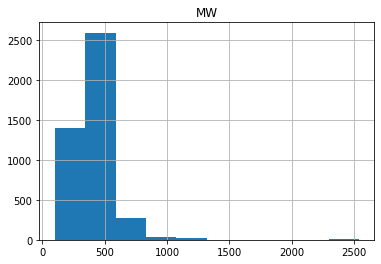

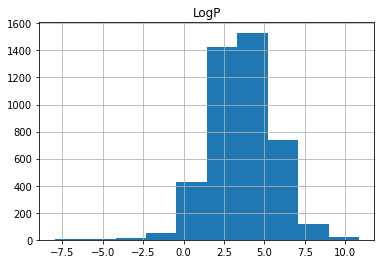

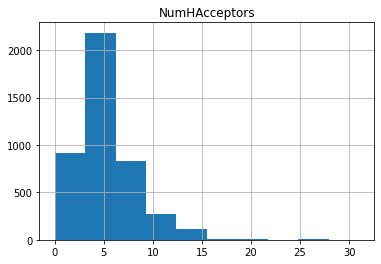

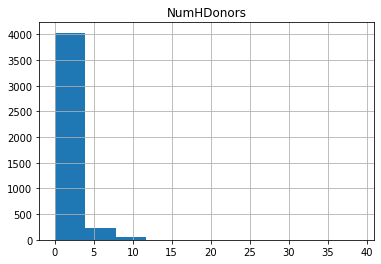

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd

#figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
#figure.set_size_inches(15,10)

# Histogram for MW
RO5 = pd.read_csv('/content/Mtb_MIC_nm_MolDes.csv', header = 0)

RO5.hist(column='MW')
RO5.hist(column='LogP')
RO5.hist(column='NumHAcceptors')
RO5.hist(column='NumHDonors')

In [19]:
RO5.max()

<ipython-input-19-e51489c25935>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  RO5.max()


index                                                                     4329
activity_comment                                                           NaN
activity_id                                                           23311265
activity_properties          [{'comments': None, 'relation': '=', 'result_f...
assay_chembl_id                                                   CHEMBL997701
assay_description            Tuberculostatic activity against Mycobacterium...
assay_type                                                                   F
assay_variant_accession                                                    NaN
assay_variant_mutation                                                     NaN
bao_endpoint                                                       BAO_0002146
bao_format                                                         BAO_0000218
bao_label                                                organism-based format
canonical_smiles                                    

In [20]:
RO5.min()

<ipython-input-20-869280e02a20>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  RO5.min()


index                                                                        0
activity_comment                                                           NaN
activity_id                                                             146062
activity_properties                                                         []
assay_chembl_id                                                  CHEMBL1000920
assay_description            Anti-tubercular activity against Mycobacterium...
assay_type                                                                   F
assay_variant_accession                                                    NaN
assay_variant_mutation                                                     NaN
bao_endpoint                                                       BAO_0002146
bao_format                                                         BAO_0000019
bao_label                                                         assay format
canonical_smiles                                    

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


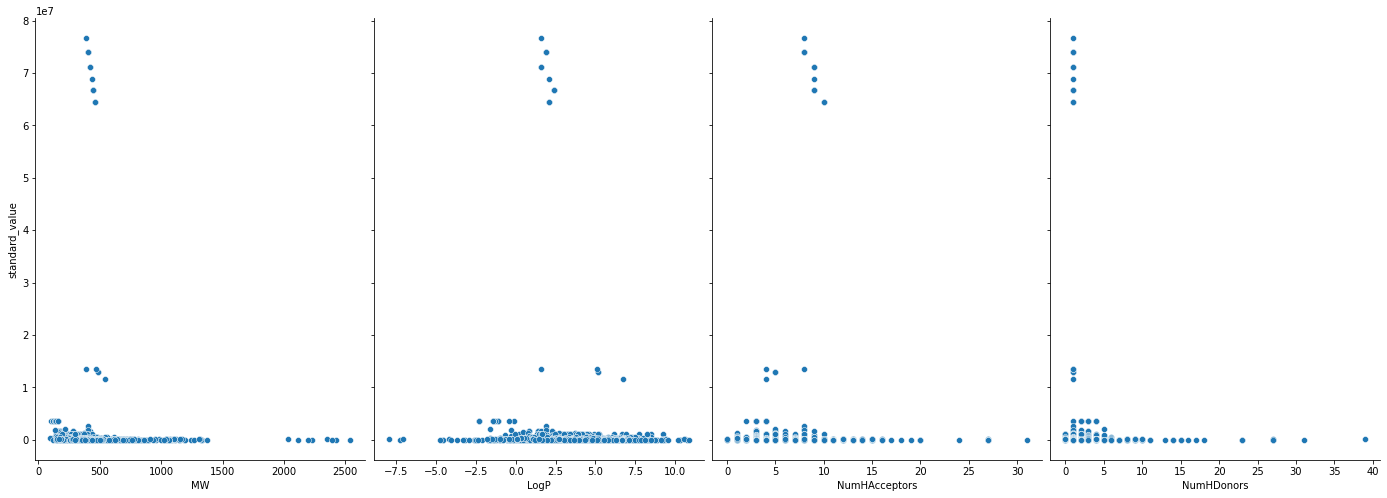

In [23]:
import seaborn as sns
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_combined, x_vars=['MW','LogP','NumHAcceptors','NumHDonors'], y_vars='standard_value', size=7, aspect=0.7)

## Removing outliers

Not mendatory, here remving some compounds with beyond RO5 rules


In [27]:
df_combined_new = df_combined[df_combined.MW.between(200, 1000, inclusive=True)  &
        df_combined.LogP.between(-5, 12, inclusive=True)   &
        df_combined.NumHAcceptors.between(0, 20, inclusive=True) &
        df_combined.NumHDonors.between(0, 20, inclusive=True)] # The inclusive (True: <=, False: <)

df_combined_new

<ipython-input-27-d9f8695ec17e>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_combined_new = df_combined[df_combined.MW.between(200, 1000, inclusive=True)  &
<ipython-input-27-d9f8695ec17e>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_combined.LogP.between(-5, 12, inclusive=True)   &
<ipython-input-27-d9f8695ec17e>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_combined.NumHAcceptors.between(0, 20, inclusive=True) &
<ipython-input-27-d9f8695ec17e>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_combined.NumHDonors.between(0, 20, inclusive=True)] # The inclusive (True: <=, False: <)


,index,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,type,units,uo_units,upper_value,value,Activity,MW,LogP,NumHDonors,NumHAcceptors
3,3,NaN,229678,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,50000.0,No,262.273,0.6769,0.0,8.0
5,5,NaN,236130,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,200000.0,No,293.348,2.7705,0.0,7.0
7,7,NaN,241502,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,50000.0,No,277.280,1.4451,0.0,7.0
9,9,NaN,248196,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,200000.0,No,293.348,2.7705,0.0,7.0
10,10,NaN,251034,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,200000.0,No,278.268,0.8401,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,4325,NaN,3112116,[],CHEMBL1071113,Antimycobacterial activity against Mycobacteri...,F,NaN,NaN,BAO_0002146,...,MIC,umol/L,UO_0000065,NaN,2000.0,Yes,381.259,5.1342,2.0,3.0
4326,4326,NaN,3078080,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,1400.0,Yes,588.636,4.7772,1.0,7.0
4327,4327,NaN,3078082,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,2600.0,Yes,621.546,5.8058,1.0,7.0
4328,4328,NaN,3078067,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,MIC,uM,UO_0000065,NaN,2800.0,Yes,578.084,5.5224,1.0,5.0


## Convert MIC to pMIC (negative logarithm of MIC)


In [28]:
# to keep the value positive
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [29]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-28-48f767df5da0>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,index,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,units,uo_units,upper_value,value,Activity,MW,LogP,NumHDonors,NumHAcceptors,value_norm
0,0,NaN,223236,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,50000.0,No,180.188,1.1583,0.0,5.0,50000.0
1,1,NaN,224658,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,25000.0,No,181.176,0.5533,0.0,6.0,25000.0
2,2,NaN,225914,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,1600000.0,No,179.204,1.4203,1.0,5.0,1600000.0
3,3,NaN,229678,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,50000.0,No,262.273,0.6769,0.0,8.0,50000.0
4,4,NaN,232421,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,800000.0,No,164.124,0.2322,1.0,6.0,800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,4325,NaN,3112116,[],CHEMBL1071113,Antimycobacterial activity against Mycobacteri...,F,NaN,NaN,BAO_0002146,...,umol/L,UO_0000065,NaN,2000.0,Yes,381.259,5.1342,2.0,3.0,2000.0
4326,4326,NaN,3078080,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,1400.0,Yes,588.636,4.7772,1.0,7.0,1400.0
4327,4327,NaN,3078082,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,2600.0,Yes,621.546,5.8058,1.0,7.0,2600.0
4328,4328,NaN,3078067,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,2800.0,Yes,578.084,5.5224,1.0,5.0,2800.0


In [30]:

# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def MIC(input):
    pMIC = []

    for i in input['value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pMIC.append(-np.log10(molar))

    input['pMIC'] = pMIC
    x = input.drop('value_norm', 1)
        
    return x

In [31]:
df_combined_2 = MIC(df_norm)
df_combined_2

<ipython-input-30-865b3a50bf5a>:10: RuntimeWarning: divide by zero encountered in log10
  pMIC.append(-np.log10(molar))
<ipython-input-30-865b3a50bf5a>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('value_norm', 1)


,index,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,units,uo_units,upper_value,value,Activity,MW,LogP,NumHDonors,NumHAcceptors,pMIC
0,0,NaN,223236,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,50000.0,No,180.188,1.1583,0.0,5.0,4.301030
1,1,NaN,224658,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,25000.0,No,181.176,0.5533,0.0,6.0,4.602060
2,2,NaN,225914,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,1600000.0,No,179.204,1.4203,1.0,5.0,2.795880
3,3,NaN,229678,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,50000.0,No,262.273,0.6769,0.0,8.0,4.301030
4,4,NaN,232421,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,800000.0,No,164.124,0.2322,1.0,6.0,3.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,4325,NaN,3112116,[],CHEMBL1071113,Antimycobacterial activity against Mycobacteri...,F,NaN,NaN,BAO_0002146,...,umol/L,UO_0000065,NaN,2000.0,Yes,381.259,5.1342,2.0,3.0,5.698970
4326,4326,NaN,3078080,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,1400.0,Yes,588.636,4.7772,1.0,7.0,5.853872
4327,4327,NaN,3078082,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,2600.0,Yes,621.546,5.8058,1.0,7.0,5.585027
4328,4328,NaN,3078067,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,2800.0,Yes,578.084,5.5224,1.0,5.0,5.552842


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


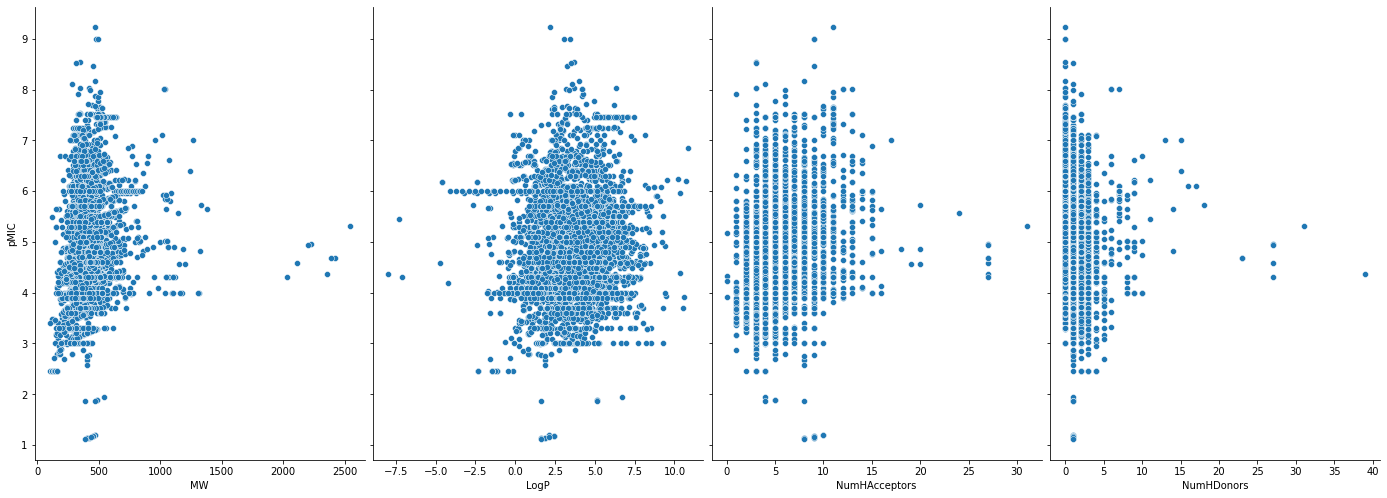

In [33]:
sns.pairplot(df_combined_2, x_vars=['MW','LogP','NumHAcceptors','NumHDonors'], y_vars='pMIC', size=7, aspect=0.7)

## Removing the 'intermediate' bioactivity class

In [34]:
df_combined_3 = df_combined_2[df_combined_2['Activity'] != 'intermediate']
df_combined_3

,index,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,units,uo_units,upper_value,value,Activity,MW,LogP,NumHDonors,NumHAcceptors,pMIC
0,0,NaN,223236,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,50000.0,No,180.188,1.1583,0.0,5.0,4.301030
1,1,NaN,224658,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,25000.0,No,181.176,0.5533,0.0,6.0,4.602060
2,2,NaN,225914,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,1600000.0,No,179.204,1.4203,1.0,5.0,2.795880
3,3,NaN,229678,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,50000.0,No,262.273,0.6769,0.0,8.0,4.301030
4,4,NaN,232421,[],CHEMBL858377,Minimum inhibitory concentration against Mycob...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,800000.0,No,164.124,0.2322,1.0,6.0,3.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,4325,NaN,3112116,[],CHEMBL1071113,Antimycobacterial activity against Mycobacteri...,F,NaN,NaN,BAO_0002146,...,umol/L,UO_0000065,NaN,2000.0,Yes,381.259,5.1342,2.0,3.0,5.698970
4326,4326,NaN,3078080,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,1400.0,Yes,588.636,4.7772,1.0,7.0,5.853872
4327,4327,NaN,3078082,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,2600.0,Yes,621.546,5.8058,1.0,7.0,5.585027
4328,4328,NaN,3078067,[],CHEMBL1069201,Antitubercular activity against Mycobacterium ...,F,NaN,NaN,BAO_0002146,...,uM,UO_0000065,NaN,2800.0,Yes,578.084,5.5224,1.0,5.0,5.552842


In [38]:
df_combined_3.to_csv('Mtb_pMIC_MolDes_nM.csv', sep=',' ,index=False)

<ipython-input-39-567984e07189>:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


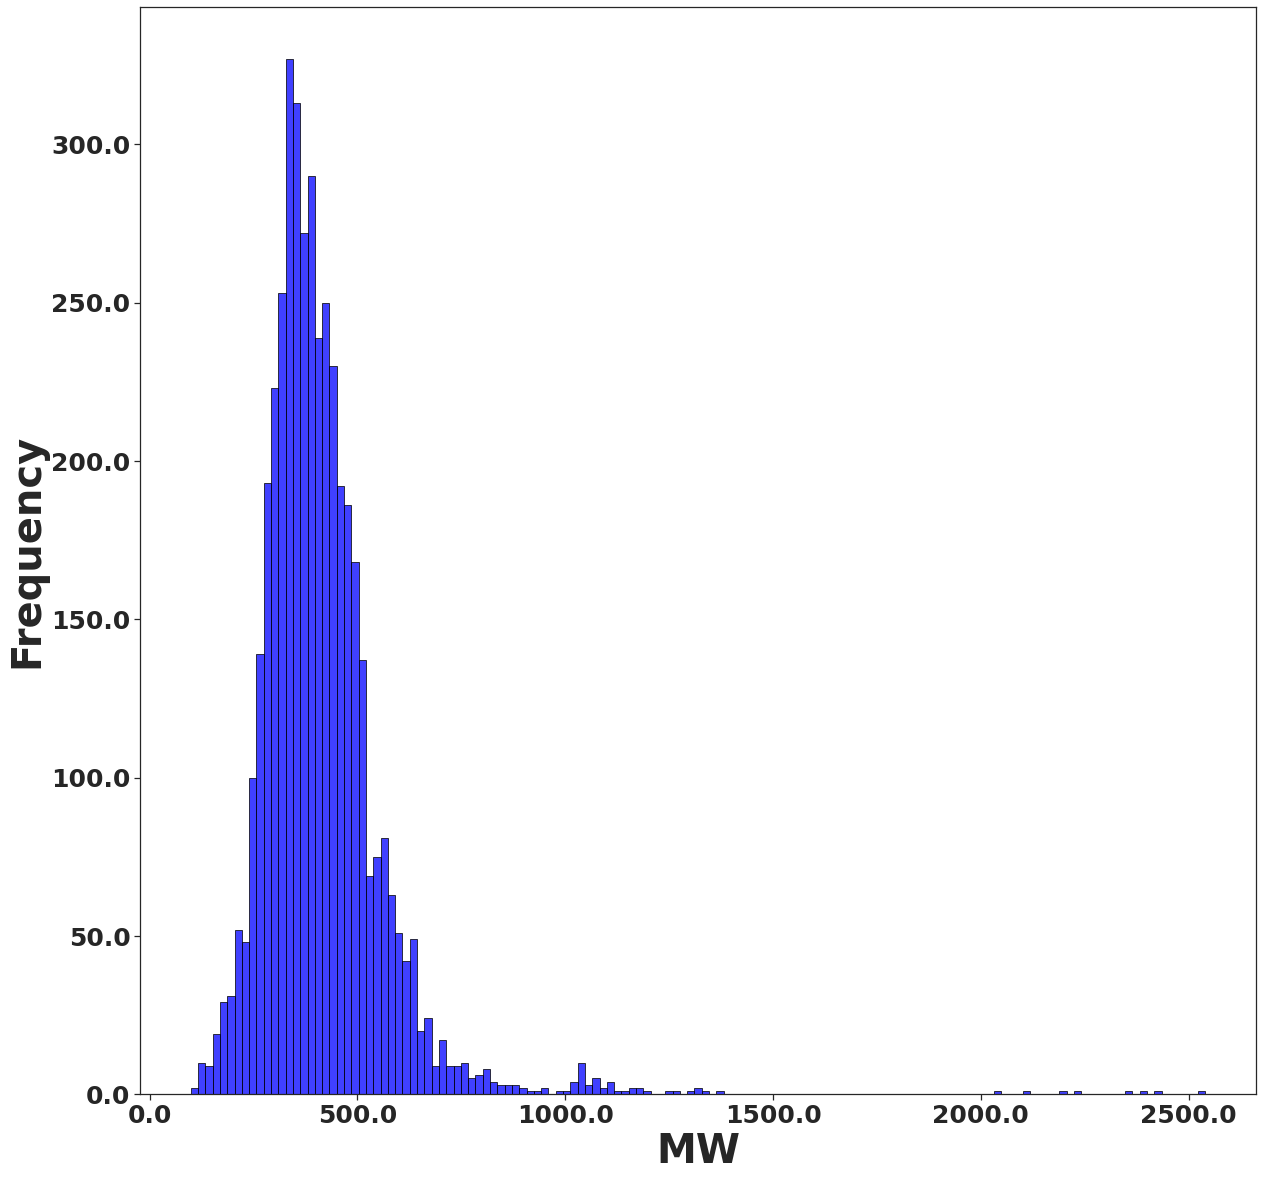

In [39]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas.util.testing as tm



#Frequency plot of the 3 bioactivity classes

plt.figure(figsize=(20, 20))

b = sns.histplot(x='MW', data=df_combined_3, color= "blue", edgecolor='black')
b.set_yticklabels(b.get_yticks(), size = 25, fontweight='bold')
b.set_xticklabels(b.get_xticks(), size = 25, fontweight='bold')

plt.xlabel('MW', fontsize=40, fontweight='bold')
plt.ylabel('Frequency', fontsize=40, fontweight='bold')

plt.savefig('plot_MW_frequency.pdf', dpi=1200)

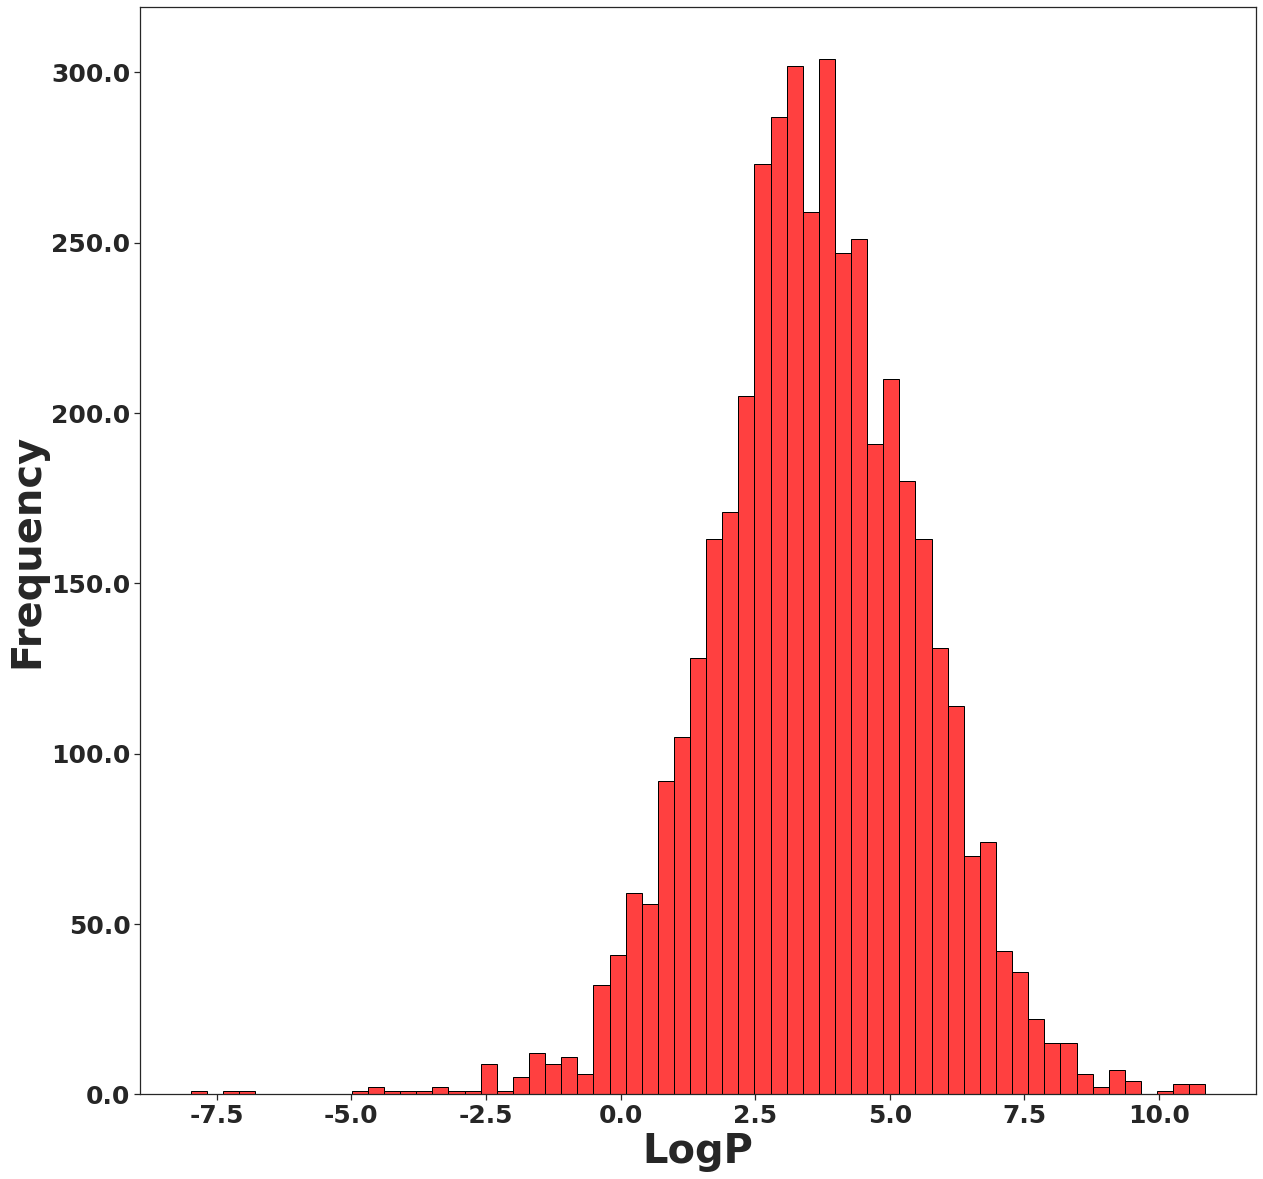

In [40]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas.util.testing as tm



#Frequency plot of the 3 bioactivity classes

plt.figure(figsize=(20, 20))

b = sns.histplot(x='LogP', data=df_combined_3, color= "red", edgecolor='black')
b.set_yticklabels(b.get_yticks(), size = 25, fontweight='bold')
b.set_xticklabels(b.get_xticks(), size = 25, fontweight='bold')

plt.xlabel('LogP', fontsize=40, fontweight='bold')
plt.ylabel('Frequency', fontsize=40, fontweight='bold')

plt.savefig('plot_LogP_frequency.pdf', dpi=1200)

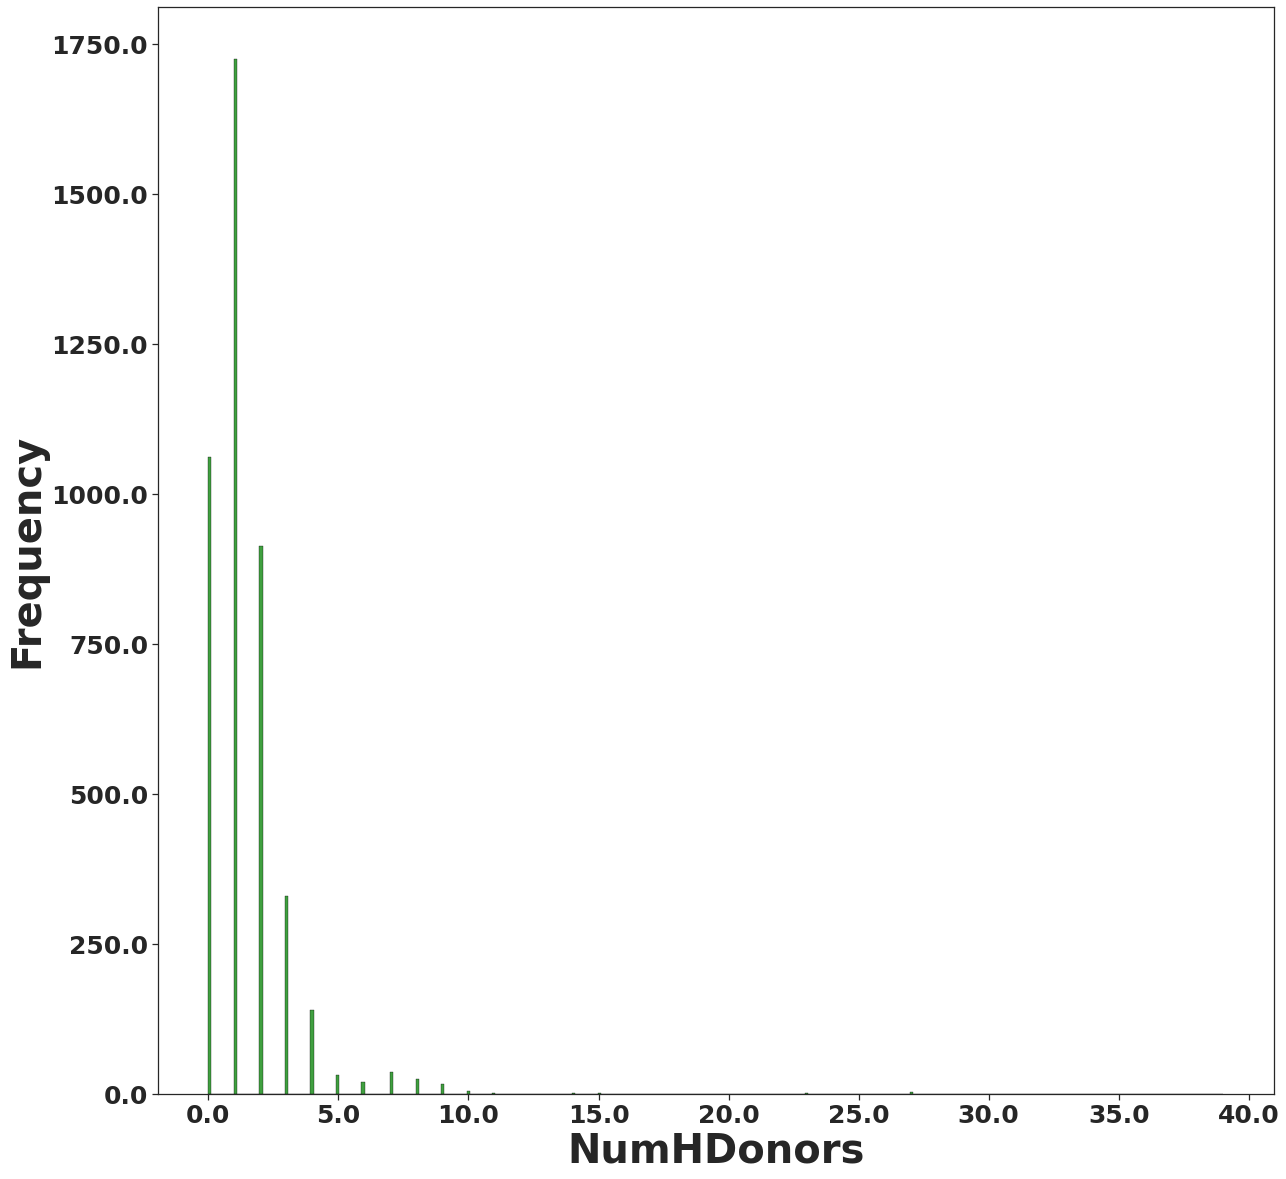

In [41]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas.util.testing as tm



#Frequency plot of the 3 bioactivity classes

plt.figure(figsize=(20, 20))

b = sns.histplot(x='NumHDonors', data=df_combined_3, color= "green", edgecolor='black')
b.set_yticklabels(b.get_yticks(), size = 25, fontweight='bold')
b.set_xticklabels(b.get_xticks(), size = 25, fontweight='bold')

plt.xlabel('NumHDonors', fontsize=40, fontweight='bold')
plt.ylabel('Frequency', fontsize=40, fontweight='bold')

plt.savefig('plot_NumHDonors_frequency.pdf', dpi=1200)

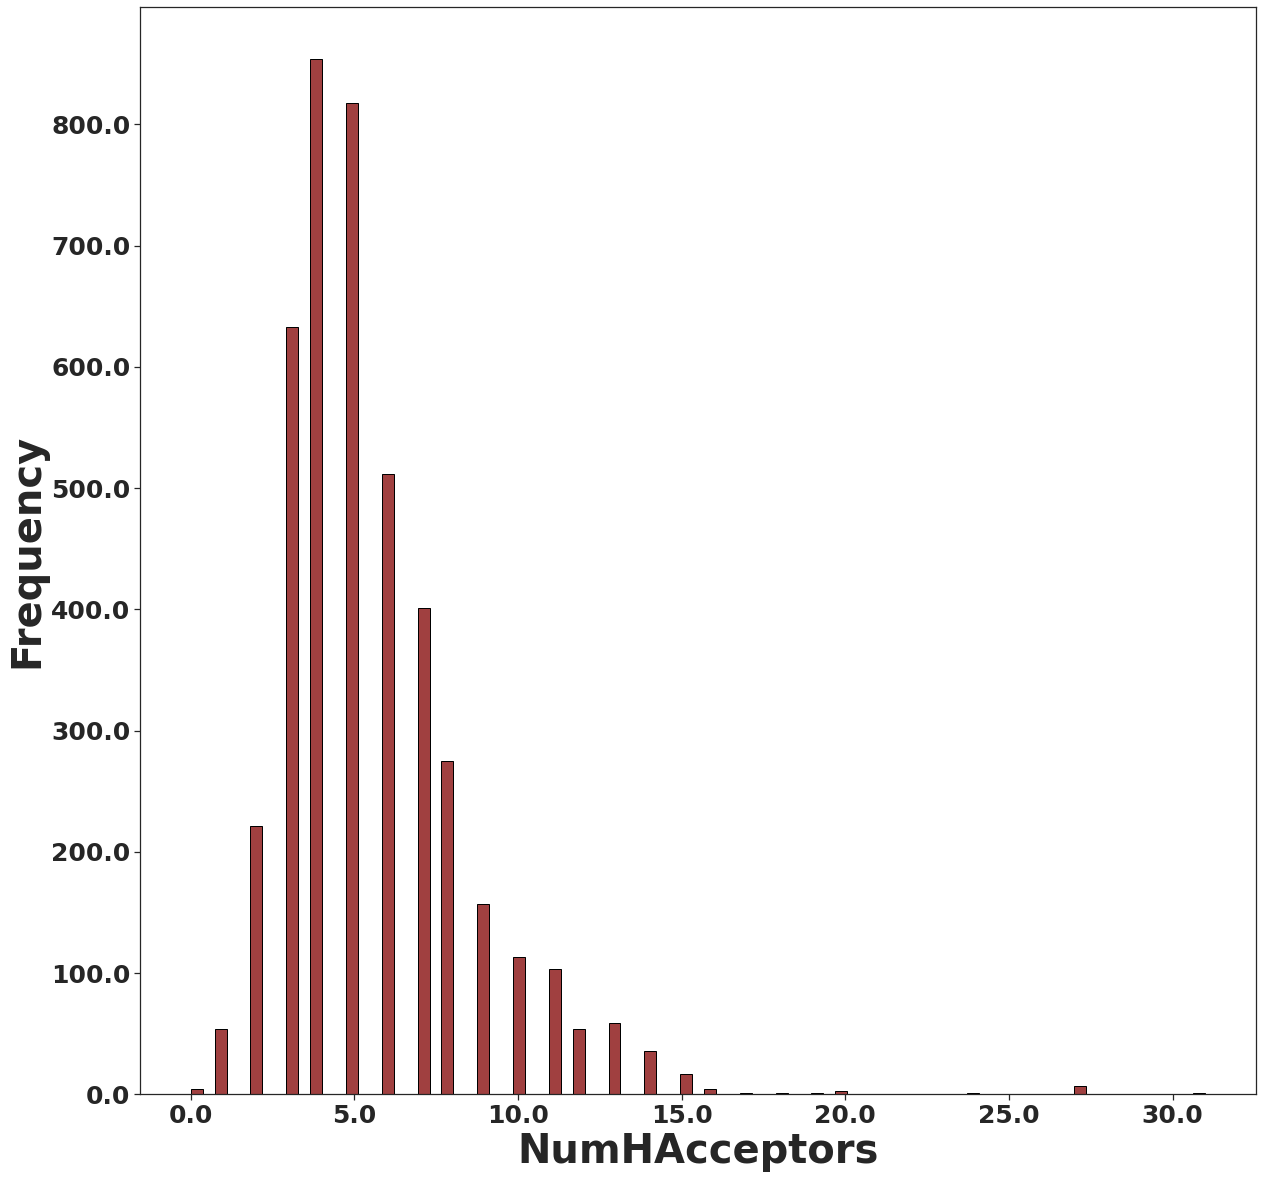

In [42]:

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas.util.testing as tm



#Frequency plot of the 3 bioactivity classes

plt.figure(figsize=(20, 20))

b = sns.histplot(x='NumHAcceptors', data=df_combined, color= "maroon", edgecolor='black')
b.set_yticklabels(b.get_yticks(), size = 25, fontweight='bold')
b.set_xticklabels(b.get_xticks(), size = 25, fontweight='bold')

plt.xlabel('NumHAcceptors', fontsize=40, fontweight='bold')
plt.ylabel('Frequency', fontsize=40, fontweight='bold')

plt.savefig('plot_NumHAccceptors_frequency.pdf', dpi=1200)

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

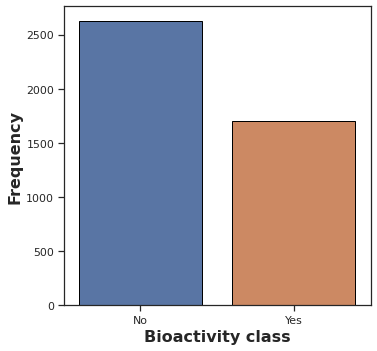

In [45]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas.util.testing as tm



#Frequency plot of the 3 bioactivity classes

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='Activity', data=df_combined_3, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf', dpi=1200)
     

## Scatter plot of MW versus LogP

Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

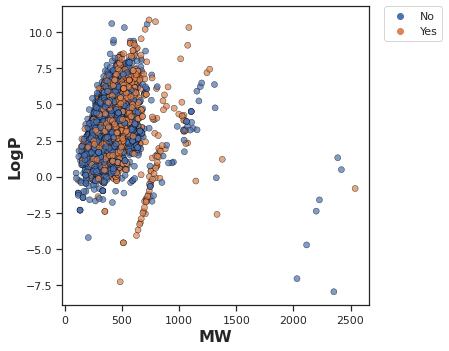

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_combined_3, hue='Activity', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=16, fontweight='bold')
plt.ylabel('LogP', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf', dpi=1200)

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


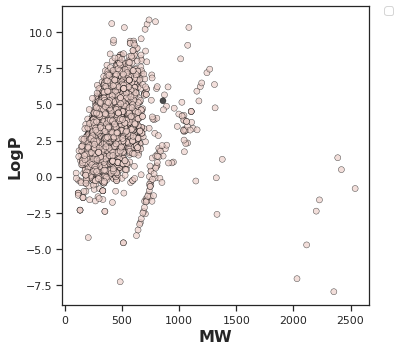

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_combined_3, hue='pMIC', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=16, fontweight='bold')
plt.ylabel('LogP', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf', dpi=1200)


## Box plots
pIC50 value




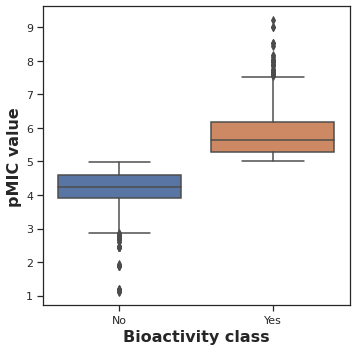

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y = 'pMIC', data = df_combined_3)

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('pMIC value', fontsize=16, fontweight='bold')

plt.savefig('plot_pMIC.pdf', dpi=1200)

### Statistical analysis | Mann-Whitney U test : Mann whiteny U test, is used to test wheteher two samples are likely to derive from the same population., the two populations have the same shape.

In [57]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'Activity']
  df = df_combined_3[selection]
  active = df[df.Activity == 'Yes']
  active = active[descriptor]

  selection = [descriptor, 'Activity']
  df = df_combined_3[selection]
  inactive = df[df.Activity == 'No']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
     

In [58]:
mannwhitney('pMIC')

,Descriptor,Statistics,p,alpha,Interpretation
0,pMIC,4471929.0,0.0,0.05,Different distribution (reject H0)


## MW

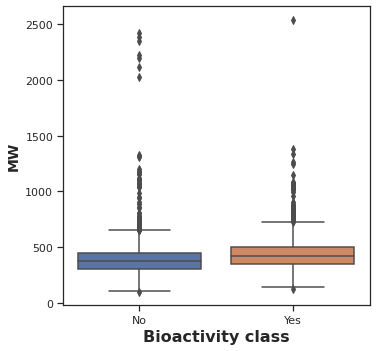

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y = 'MW', data = df_combined_3)

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf', dpi=1200)

In [60]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2829057.5,2.541331e-49,0.05,Different distribution (reject H0)


## LogP

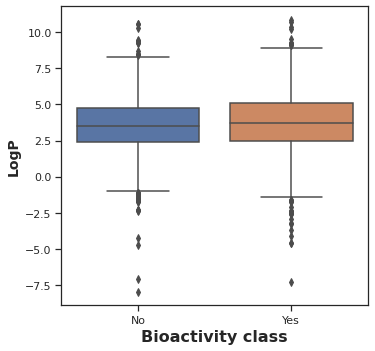

In [61]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y = 'LogP', data = df_combined_3)

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf', dpi=1200)
     

In [62]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2340012.5,0.009601,0.05,Different distribution (reject H0)


## NumHDonors

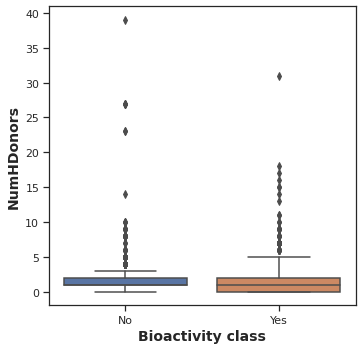

In [63]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y = 'NumHDonors', data = df_combined_3)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf', dpi=1200)

In [64]:

mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2307873.5,0.060891,0.05,Same distribution (fail to reject H0)


## NumAcceptors

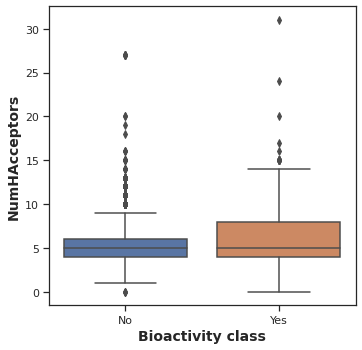

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y = 'NumHAcceptors', data = df_combined_3)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf', dpi=1200)

In [66]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2643331.0,1.242901e-24,0.05,Different distribution (reject H0)
